Looking for some examples on how to use docTR for OCR-related tasks? You've come to the right place 😀

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Installation

Install all the dependencies to make the most out of docTR. The project provides two main [installation](https://mindee.github.io/doctr/latest/installing.html) streams: one for stable release, and developer mode.

## Latest stable release

This will install the last stable release that was published by our teams on pypi. It is expected to provide a clean and non-buggy experience for all users.

In [16]:
# TensorFlow
# !pip install python-doctr[tf,viz]

# PyTorch
# First we have to uninstall the preinstalled tensorflow version if we want to work with PyTorch as backend
# because the env variables USE_TORCH=1 / USE_TF=1 doesn't have an effect in Colab
!pip uninstall -y tensorflow
!pip install python-doctr[torch,viz]

## From source

Before being staged for a stable release, we constantly iterate on the community feedback to improve the library. Bug fixes and performance improvements are regularly pushed to the project Git repository. Using this installation method, you will access all the latest features that have not yet made their way to a pypi release!

In [17]:
# Install the most up-to-date version from GitHub

# TensorFlow
# !pip install python-doctr[tf,viz]@git+https://github.com/mindee/doctr.git

# PyTorch
# First we have to uninstall the preinstalled tensorflow version if we want to work with PyTorch as backend
# because the env variables USE_TORCH=1 / USE_TF=1 doesn't have an effect in Colab
!pip uninstall -y tensorflow
!pip install python-doctr[torch,viz]@git+https://github.com/mindee/doctr.git

  Cloning https://github.com/mindee/doctr.git to /tmp/pip-install-2e6fdnnr/python-doctr_58b4d2f8919c4ff28f32686c7205bdb9
  Running command git clone --filter=blob:none --quiet https://github.com/mindee/doctr.git /tmp/pip-install-2e6fdnnr/python-doctr_58b4d2f8919c4ff28f32686c7205bdb9
  Resolved https://github.com/mindee/doctr.git to commit e6bf82d6a74a52cedac17108e596b9265c4e43c5
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


# Basic usage

We're going to review the main features of docTR 🎁
And for you to have a proper overview of its capabilities, we will need some free fonts for a proper output visualization:

In [18]:
# Install some free fonts for result rendering
!sudo apt-get install fonts-freefont-ttf -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-freefont-ttf is already the newest version (20120503-10build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


Let's take care of all the imports directly

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

from doctr.io import DocumentFile
from doctr.models import ocr_predictor

For the next steps, we will need a proper PDF document that will be used to showcase the library features

In [5]:
# Download a sample
#!wget https://eforms.com/download/2019/01/Cash-Payment-Receipt-Template.pdf
# Read the file
doc = DocumentFile.from_pdf("/content/drive/MyDrive/1.pdf")
print(f"Number of pages: {len(doc)}")

--2024-12-25 04:37:02--  https://eforms.com/download/2019/01/Cash-Payment-Receipt-Template.pdf
Resolving eforms.com (eforms.com)... 104.26.1.24, 172.67.73.188, 104.26.0.24, ...
Connecting to eforms.com (eforms.com)|104.26.1.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16080 (16K) [application/pdf]
Saving to: ‘Cash-Payment-Receipt-Template.pdf’

Cash-Payment-Receip 100%[===================>]  15.70K  --.-KB/s    in 0s      

2024-12-25 04:37:02 (111 MB/s) - ‘Cash-Payment-Receipt-Template.pdf’ saved [16080/16080]

Number of pages: 1


docTR is, under the hood, running Deep Learning models to perform the different tasks it supports. Those models were built and trained with very popular frameworks for maximum compatibility (you will be pleased to know that you can switch from [PyTorch](https://pytorch.org/) to [TensorFlow](https://www.tensorflow.org/) without noticing any difference for you). By default, our high-level API sets the best default values so that you get high performing models without having to know anything about it. All of this is wrapper in a `Predictor` object, which will take care of pre-processing, model inference and post-processing for you ⚡

Let's instantiate one!

In [6]:
# Instantiate a pretrained model
predictor = ocr_predictor(pretrained=True)

  0%|          | 0/65814772 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/doctr/models/utils/pytorch.py:62: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(archive_path, map_location="c

  0%|          | 0/63286381 [00:00<?, ?it/s]

By default, PyTorch model provides a nice visual description of a model, which is handy when it comes to debugging or knowing what you just created. We also added a similar feature for TensorFlow backend so that you don't miss on this nice assistance.

Let's dive into this model 🕵

In [7]:
# Display the architecture
print(predictor)

OCRPredictor(
  (det_predictor): DetectionPredictor(
    (pre_processor): PreProcessor(
      (resize): Resize(output_size=(1024, 1024), interpolation='bilinear', preserve_aspect_ratio=True, symmetric_pad=True)
      (normalize): Normalize(mean=(0.798, 0.785, 0.772), std=(0.264, 0.2749, 0.287))
    )
    (model): FAST()
  )
  (reco_predictor): RecognitionPredictor(
    (pre_processor): PreProcessor(
      (resize): Resize(output_size=(32, 128), interpolation='bilinear', preserve_aspect_ratio=True, symmetric_pad=False)
      (normalize): Normalize(mean=(0.694, 0.695, 0.693), std=(0.299, 0.296, 0.301))
    )
    (model): CRNN(
      (feat_extractor): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(64, eps=1e-05, momentum=

Here we are inspecting the most complex (and high-level) object of docTR API: an OCR predictor. Since docTR achieves Optical Character Recognition by first localizing textual elements (Text Detection), then extracting the corresponding text from each location (Text Recognition), the OCR Predictor wraps two sub-predictors: one for text detection, and the other for text recognition.

## Basic inference

It looks quite complex, isn't it?
Well that will not prevent you from easily get nice results. See for yourself:

In [8]:
result = predictor(doc)

## Prediction visualization

If you rightfully prefer to see the results with your eyes, docTR includes a few visualization features. We will first overlay our predictions on the original document:

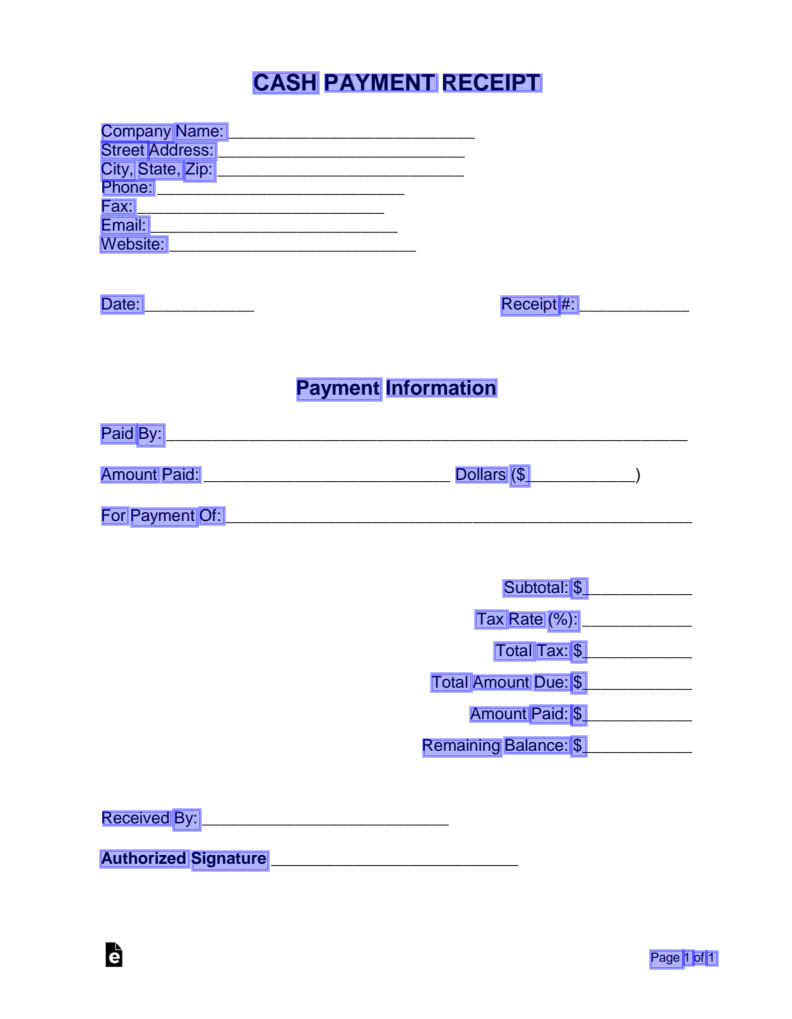

In [9]:
result.show()

Looks accurate!
But we can go further: if the extracted information is correctly structured, we should be able to recreate the page entirely. So let's do this 🎨

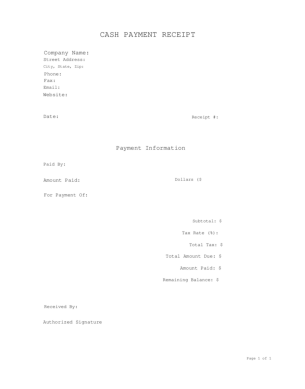

In [10]:
synthetic_pages = result.synthesize()
plt.imshow(synthetic_pages[0]); plt.axis('off'); plt.show()

## Exporting results

OK, so the predictions are relevant, but how would you integrate this into your own document processing pipeline? Perhaps you're not using Python at all?

Well, if you happen to be using JSON or XML exports, they are already supported 🤗

In [11]:
# JSON export
json_export = result.export()
print(json_export)

{'pages': [{'page_idx': 0, 'dimensions': (1584, 1224), 'orientation': {'value': None, 'confidence': None}, 'language': {'value': None, 'confidence': None}, 'blocks': [{'geometry': ((0.11580882352941174, 0.0625), (0.9145220588235294, 0.958984375)), 'objectness_score': 0.7954577384171663, 'lines': [{'geometry': ((0.3142233455882353, 0.0625), (0.6870404411764706, 0.083984375)), 'objectness_score': 0.8068580031394958, 'words': [{'value': 'CASH', 'confidence': 0.9986966252326965, 'geometry': ((0.3142233455882353, 0.0625), (0.39763327205882354, 0.083984375)), 'objectness_score': 0.7790147662162781, 'crop_orientation': {'value': 0, 'confidence': None}}, {'value': 'PAYMENT', 'confidence': 0.9944130778312683, 'geometry': ((0.40774356617647056, 0.064453125), (0.5518152573529411, 0.08203125)), 'objectness_score': 0.8103041052818298, 'crop_orientation': {'value': 0, 'confidence': None}}, {'value': 'RECEIPT', 'confidence': 0.9994043111801147, 'geometry': ((0.5606617647058824, 0.064453125), (0.68704

In [12]:
# XML export
xml_output = result.export_as_xml()
print(xml_output[0][0])

b'<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en"><head><title>docTR - XML export (hOCR)</title><meta http-equiv="Content-Type" content="text/html; charset=utf-8" /><meta name="ocr-system" content="python-doctr 0.10.1a0" /><meta name="ocr-capabilities" content="ocr_page ocr_carea ocr_par ocr_line ocrx_word" /></head><body><div class="ocr_page" id="page_1" title="image; bbox 0 0 1224 1584; ppageno 0" /><div class="ocr_carea" id="block_1" title="bbox 142 99                     1119 1519"><p class="ocr_par" id="par_1" title="bbox 142 99                     1119 1519"><span class="ocr_line" id="line_1" title="bbox 385 99                         841 133;                         baseline 0 0; x_size 0; x_descenders 0; x_ascenders 0"><span class="ocrx_word" id="word_1" title="bbox 385 99                             487 133;                             x_wconf 100">CASH</span><span class="ocrx_word" id="word_2" title="bbox 499 102                             675 130;                  

Or if you only need the extracted plain text

In [13]:
string_result = result.render()
print(string_result)

CASH PAYMENT RECEIPT
Company Name:
Street Address:
City, State, Zip:
Phone:
Fax:
Email:
Website:
Date:
Receipt #:
Payment Information
Paid By:
Amount Paid:
Dollars ($
For Payment Of:
Subtotal: $
Tax Rate (%):
Total Tax: $
Total Amount Due: $
Amount Paid: $
Remaining Balance: $
Received By:
Authorized Signature
Page 1 of 1
